In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 

In [2]:
#loading the dataset
uber = pd.read_csv("uber-raw-data-sep14.csv") 
uber 

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [3]:
#parsing the 'Date/Time column to datetime format
uber['Date/Time'] = pd.to_datetime(uber['Date/Time'])
uber 

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764


In [4]:
#breaking down 'Date/Time column into 'Day', 'Hour', and 'Weekday'
uber['Day'] =uber['Date/Time'].dt.day
uber['Hour'] =uber['Date/Time'].dt.hour
uber['Weekday'] =uber['Date/Time'].dt.weekday 
uber 

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,22,1
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,22,1
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,22,1
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,22,1


In [5]:
#preparing the dataset by counting the number of trips per hour/day/weekday
uber['Trip_Count'] = uber.groupby(['Hour', 'Day', 'Weekday'])['Hour'].transform('count')
uber 

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday,Trip_Count
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0,699
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0,699
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0,699
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0,699
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0,699
...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,22,1,1347
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,22,1,1347
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,22,1,1347
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,22,1,1347


In [6]:
#features (Hour, day, Weekday) and target (Trip_Count)
x = uber[['Hour', 'Day', 'Weekday']]
y = uber['Trip_Count'] 

In [7]:
#train-test split (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) 

In [8]:
#Liner Regression Model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {mse_lr}")

Linear Regression Mean Squared Error: 301561.5642123331


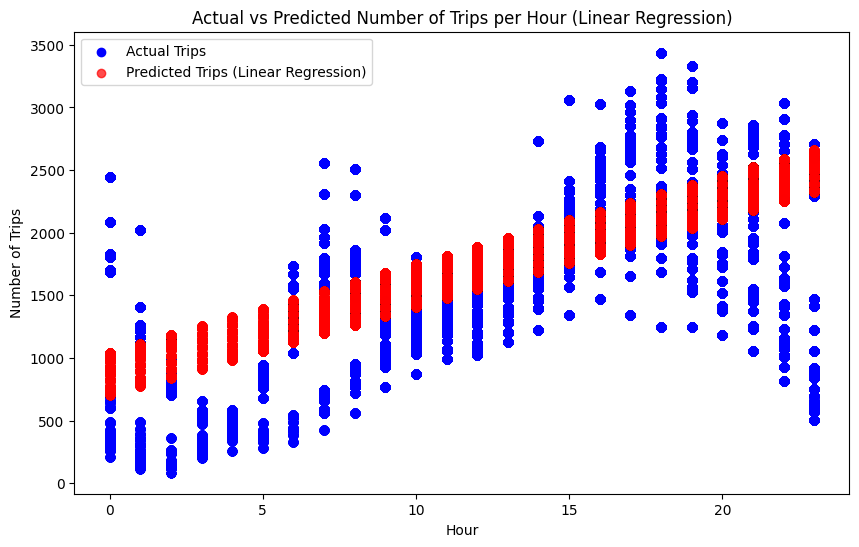

In [9]:
 #visualising Actual vs Predicted for Linear Regression
plt.figure(figsize=(10,6))
plt.scatter(x_test['Hour'], y_test, color='blue', label='Actual Trips')
plt.scatter(x_test['Hour'], y_pred_lr, color='red', label='Predicted Trips (Linear Regression)', alpha=0.7)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Actual vs Predicted Number of Trips per Hour (Linear Regression)')
plt.legend()
plt.show()  

In [10]:
#Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Square Error: {mse_rf}") 

Random Forest Mean Square Error: 0.0


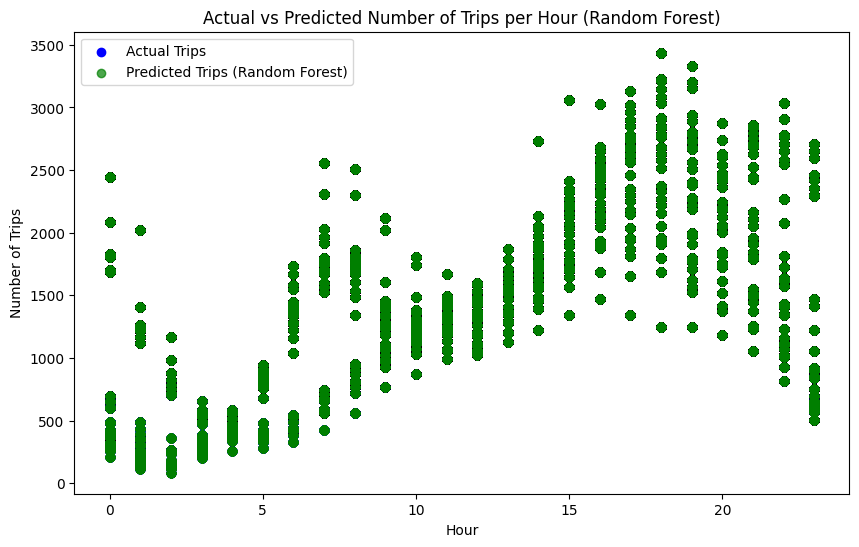

In [11]:
#visuaising Actual vs Predicted for Random Forest
plt.figure(figsize=(10,6))
plt.scatter(x_test['Hour'], y_test, color='blue', label='Actual Trips')
plt.scatter(x_test['Hour'], y_pred_rf, color='green', label='Predicted Trips (Random Forest)', alpha=0.7)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Actual vs Predicted Number of Trips per Hour (Random Forest)')
plt.legend()
plt.show() 

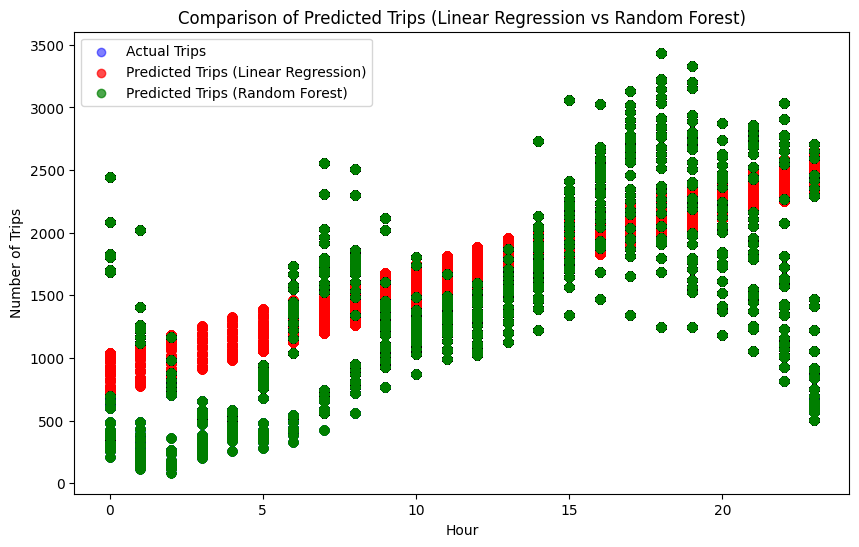

In [13]:
#visualisng comparison: Linear Regression vs Random Forest
plt.figure(figsize=(10,6))
plt.scatter(x_test['Hour'], y_test, color='blue', label='Actual Trips', alpha=0.5)
plt.scatter(x_test['Hour'], y_pred_lr, color='red', label='Predicted Trips (Linear Regression)', alpha=0.7)
plt.scatter(x_test['Hour'], y_pred_rf, color='green', label='Predicted Trips (Random Forest)', alpha=0.7)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Comparison of Predicted Trips (Linear Regression vs Random Forest)')
plt.legend()
plt.show() 